# Installation

In [2]:
!git clone https://github.com/TheShenk/hai-nonconflict-action-learning.git

Cloning into 'hai-nonconflict-action-learning'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 83 (delta 25), reused 43 (delta 17), pack-reused 30
Unpacking objects: 100% (83/83), done.


In [1]:
!cd hai-nonconflict-action-learning/

/content/hai-nonconflict-action-learning


In [2]:
!pip install stable-baselines3[extra] pymunk pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [1]:
import gym
import gym_futbol
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common import results_plotter
from tqdm.notebook import tqdm
import utils
from multiagent import MultiAgentOnPolicyProxy, multiagent_learn
from IPython import display

pygame 2.1.0 (SDL 2.0.16, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Basics

Reset


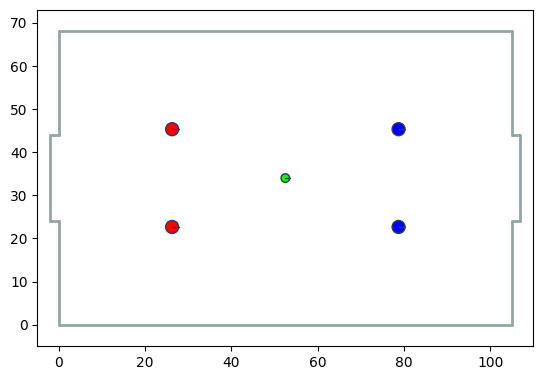

In [2]:
env = gym.make("Futbol2v2-v1")
env.render()

In [5]:
env.action_space

MultiDiscrete([5 5 5 5])

In [6]:
from stable_baselines3.common.env_checker import check_env
check_env(env)

# Learning model

In [2]:
log_dir = "logs/"
timesteps = 50000

In [3]:
from stable_baselines3.common.env_util import make_vec_env

env = gym.make("Futbol2v2-v1")
env = make_vec_env(lambda: env, n_envs=4, monitor_dir=log_dir)
model = A2C("MlpPolicy", env, device='cpu')
model.learn(timesteps)
model.save("models/footbol2v2-ppo")

# Display model statistic

     index            r   l          t
0        0   155.344302  75   0.836995
1        1    37.251805  75   1.236683
2        2   246.193750  75   1.547551
3        3 -1014.314991  75   1.856825
4        4   295.685775  75   2.164369
..     ...          ...  ..        ...
161    161  1597.695812  75  57.009118
162    162   -56.477502  75  57.346870
163    163  2567.793982  75  57.695286
164    164   363.661477  75  58.012881
165    165   113.101150  75  58.335833

[166 rows x 4 columns]


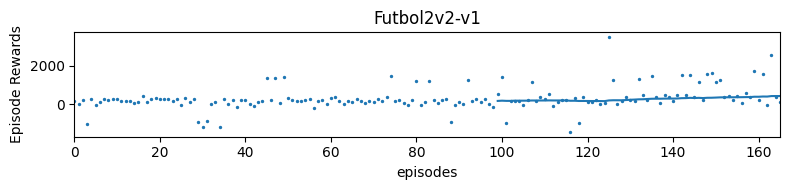

In [4]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

log_data = results_plotter.load_results(log_dir)
print(log_data)

# Load model from file

In [12]:
model = PPO.load("models/footbol2v2-ppo", device="cpu")

# Run models

## Pygame
Run game with model in new windows with pygame

In [13]:
RES = WIDTH, HEIGHT = 600, 400
FPS = 60

env = gym.make("Futbol2v2-v1")
visualizer = utils.PygameVisualizer(env, RES, FPS)
visualizer.run(model)

env.close()
visualizer.close()

## Matplotlib
Run model in notebook with matplotlib

KeyboardInterrupt: 

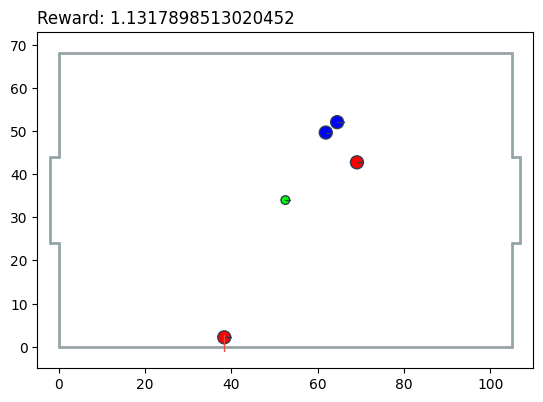

In [25]:
env = gym.make("Futbol2v2-v1")

visualizer = utils.MatplotlibVisualizer(env)
visualizer.run(model)

env.close()

# MultiAgent

## Learn

In [5]:
log_dir = "logs/futbol/ppo"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=1, monitor_dir=log_dir)

models = [
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             utils.TransformAction(env, gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
                             device='cpu')),
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             utils.TransformAction(env, gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
                             device='cpu'))
]

timesteps = 50000
max_episode_reward = 0

### Rewrote learning cycle
StableBaselines3 не поддерживает одновременное обучение нескольких агентов, это даже не ошибка по мнению разработчиков. Они считают, что в данном случае каждому пользователю необходимо самостоятельо переопределить цикл обучения (для не мультиагентных задач используется метод learn). Здесь представлен код, взятый из исходных кодов StableBaselines3, но адаптированный для многоагентных задач.
В обычной ситуации, learn сам взаимодействует со средой. Но при существовании нескольких агентов нужно получить действие от каждого и только потом передавать их в среду. Именно это здесь и реализовано. Каждому агенту передается наблюдение от среды (в данной задаче оно одинаково для всех) и получается действие. Затем действия объеядиняются и передаются среде. Затем каждый агент обновляется с учетом полученных данных (метод record).
Весь код, взятый из StableBaselines3 вынесен в класс MultiAgentModelProxy.

In [6]:
#TODO: рассмотреть возможность асинхронной среды
#TODO: добавить вывод логов для последующего использования results_plotter

In [7]:
multiagent_learn(models, timesteps, env, "models/footbol/ppo")

/tmp/ipykernel_6364/566115823.py:1: DeprecationWarning: Parameters `eval_env` and `eval_freq` are deprecated and will be removed in the future. Please use `EvalCallback` or a custom Callback instead.
  multiagent_learn(models, timesteps, env, "models/footbol/ppo")


2048 [3326.1494]
4096 [2343.977]
6144 [6089.742]
8192 [3482.7146]
10240 [4693.9946]
12288 [2733.1423]
14336 [6659.071]
16384 [6916.577]
18432 [7119.138]
20480 [3413.466]
22528 [7390.3765]
24576 [3820.3098]
26624 [4656.6743]
28672 [7303.35]
30720 [5957.359]
32768 [6850.183]
34816 [5931.638]
36864 [2588.1387]
38912 [3754.411]
40960 [5280.109]
43008 [5509.2446]
45056 [5123.45]
47104 [6511.9985]
49152 [42.87065]
51200 [7209.228]


## Statistic

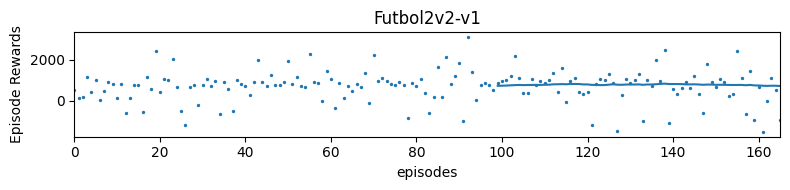

In [8]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## Load and visualise

In [5]:
from stable_baselines3 import PPO

models = [PPO.load(f"models/footbol2v2-ppo-best-{index}", device="cpu") for index in range(2)]

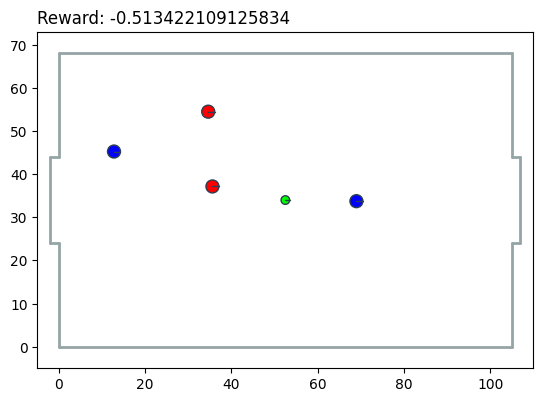

In [6]:
env = gym.make("Futbol2v2-v1")

multi_agent = utils.MultiModelAgent(models)

visualizer = utils.MatplotlibVisualizer(env)
visualizer.run(multi_agent)

env.close()

In [12]:
RES = WIDTH, HEIGHT = 600, 400
FPS = 60

env = gym.make("Futbol2v2-v1")
multi_agent = utils.MultiModelAgent(models)

visualizer = utils.PygameVisualizer(env, RES, FPS)
visualizer.run(multi_agent)

env.close()
visualizer.close()